# Exploratory Data Analysis 

In [38]:
master_df = pd.read_csv("DrugBank_curated_df.csv")

### CYP Frequency Analysis

We use `cyp_counter` (a `Counter` object) to get the 20 most common CYPs.  
These are converted into a DataFrame with columns:

- **CYP** → enzyme name  
- **DrugCount** → number of drugs metabolized  

Finally, `describe()` summarizes the distribution of drug counts among these CYPs.


In [36]:
from collections import Counter
import pandas as pd
from drug_db import cyp_counter

cyp_counter_common = dict(cyp_counter.most_common(20))
df_cyp_counter = pd.DataFrame([(cyp, count) for cyp, count in cyp_counter_common.items()], 
                              columns= ["CYP", "DrugCount"])
df_cyp_counter["DrugCount"].describe()


count      20.00000
mean      208.55000
std       247.03089
min        12.00000
25%        27.25000
50%       125.50000
75%       335.50000
max      1054.00000
Name: DrugCount, dtype: float64

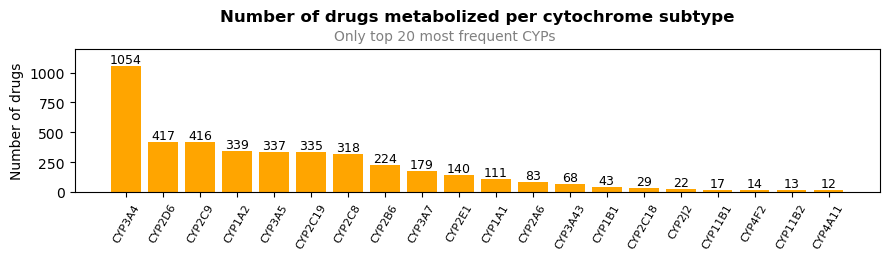

In [88]:
import matplotlib.pyplot as plt

names = df_cyp_counter["CYP"]
values = df_cyp_counter["DrugCount"]

plt.figure(figsize=(9,3))
bars = plt.bar(names, values, color = "orange")

# Add counts above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             str(height), ha='center', va='bottom', fontsize=9)

plt.ylabel("Number of drugs")
plt.xticks(rotation=60, ha="center", fontsize = 8)
plt.title("Number of drugs metabolized per cytochrome subtype", pad= 20, fontweight = "bold" )
plt.suptitle("Only top 20 most frequent CYPs", fontsize=10, color="gray", y=0.785)
plt.tight_layout()
plt.ylim(0, 1200)
plt.savefig("Figuras/cyp_counts.png", dpi=300, bbox_inches="tight")
plt.show()



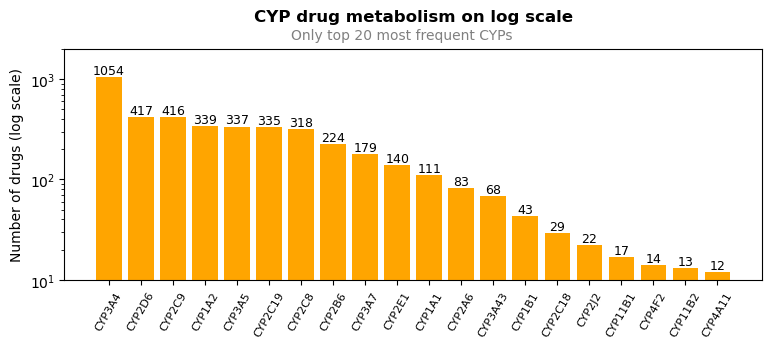

In [89]:
plt.figure(figsize=(9,3))
bars = plt.bar(names, values, color = "orange")

# Add counts above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             str(height), ha='center', va='bottom', fontsize=9)
plt.yscale('log')
plt.xticks(rotation=60, ha="center", fontsize = 8)
plt.ylabel("Number of drugs (log scale)")
plt.title("CYP drug metabolism on log scale", pad = 20, fontweight = "bold")
plt.suptitle("Only top 20 most frequent CYPs", fontsize=10, color="gray", y=0.95)
plt.ylim(10, 2000)
plt.show()

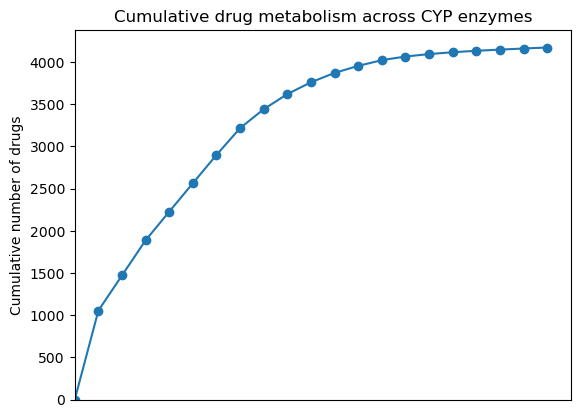

In [90]:
cumulative = df_cyp_counter["DrugCount"].cumsum()
cumulative = pd.concat([pd.Series([0]), cumulative]).reset_index(drop=True)

plt.plot(pd.concat([df_cyp_counter["CYP"], pd.Series([""])]), cumulative, marker='o')
plt.xticks([])
# force axes to start at 0
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.ylabel("Cumulative number of drugs")
plt.title("Cumulative drug metabolism across CYP enzymes")
plt.show()